In [1]:
from searchtweets import load_credentials,gen_request_parameters,collect_results,result_stream,utils
#from secrets_ar import *
import pandas as pd
import glob
import os,re
import langid
import seaborn as sns
import matplotlib.pyplot as plt
from googletrans import Translator

from tweet_utils import *

In [2]:
sns.set_context('paper',font_scale=1.5)

In [3]:
translator = Translator()

In [4]:
t = translator.translate(u'bonjour')

In [5]:
search_args = load_credentials(filename='.twitter_keys.yaml')

## Simple Query

In [ ]:
qs,prefix = makeSimpleQuery()

## More Complex Query (from taxonomy)

In [5]:
parseOperators(pd.DataFrame(data = ['A OR B AND C','A OR B OR C','A AND B OR B AND C']))

,0
0,(A) OR (B C)
1,(A) OR (B) OR (C)
2,(A B) OR (B C)


In [7]:
qs,prefix = makeComplexQuery(denoise = True)

Making complex query...


Which query (AZ/hy)? hy


hy chosen
Getting list of declined keywords...


Enter file path for keywords(default: hy_declensions.csv) russian_keywords.csv


Reading declined keywords file...
Got 70 keywords


Remove noisy terms? (veteran,truce) (Y/n) n


Not removing
Splitting queries


Enter path stem (query_hy[_<n>.csv]) query_hy_russian_keywords
Clean existing query files? (y/N) y


Removing query_hy_russian_keywords*
Shape: 70
Writing to file : query_hy_russian_keywords_0.csv
	Length written 1024

Writing to file : query_hy_russian_keywords_1.csv
	Length written 1015



In [7]:
qs[0]

'(аннексия Нахичевани  ) OR (Армения и Арцах  ) OR (Армянские погромы в Баку  ) OR (Армяне в Гяндже  ) OR (Арцах, Тигранакерт  ) OR (Авантюрная политика Азербайджана  ) OR (Агрессивная политика Азербайджана  ) OR (Милитаристская политика Азербайджана  ) OR (Азербайджанская пропаганда  ) OR (Азербайджанские беженцы  ) OR (Азербайджанские вандалы  ) OR (Азербайджанцы  ) OR (Азербайджанцы живущие в пещерах  ) OR (Азербайджанская пропагандистская истерия  ) OR (Нагорно безопасность границ  ) OR (Нагорно Перемирие  ) OR (Нагорно Сосуществование  ) OR (Нагорно Сосуществование  ) OR (Нагорно Каналы связи  ) OR (Нагорно Каналы связи  ) OR (Нагорно Компромисс  ) OR (Нагорно Механизм уверенности  ) OR (Нагорно Механизм уверенности  ) OR (Нагорно Диалог  ) OR (Нагорно Экономическое сотрудничество  ) OR (Нагорно Исключение применения силы  ) OR (Нагорно Будущие перспективы  ) OR (Нагорно Газоснабжение  ) OR (Геноцид армян в Карабахе  ) OR (Армения Признание геноцида  ) OR (Нагорно Заложники  ) OR 

## Execute all search queries

In [10]:
startTime = pd.to_datetime('20210403:00', format='%Y%m%d:%H', utc = True)
# Recent

In [17]:
startTime = pd.to_datetime('20200101:00', format='%Y%m%d:%H', utc = True)
# July 2020

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
dfs = executeQueries(qs,prefix,startTime,search_args,period = '365 days')
# period = '1 days 06:05:01.00003'

Query 0 of 2...


 HTTP Error code: 429: {"title":"Too Many Requests","type":"about:blank","status":429,"detail":"Too Many Requests"} | Too Many Requests
 Request payload: {'query': '(аннексия Нахичевани ) OR (Армения и Арцах ) OR (Армянские погромы в Баку ) OR (Армяне в Гяндже ) OR (Арцах, Тигранакерт ) OR (Авантюрная политика Азербайджана ) OR (Агрессивная политика Азербайджана ) OR (Милитаристская политика Азербайджана ) OR (Азербайджанская пропаганда ) OR (Азербайджанские беженцы ) OR (Азербайджанские вандалы ) OR (Азербайджанцы ) OR (Азербайджанцы живущие в пещерах ) OR (Азербайджанская пропагандистская истерия ) OR (Нагорно безопасность границ ) OR (Нагорно Перемирие ) OR (Нагорно Сосуществование ) OR (Нагорно Сосуществование ) OR (Нагорно Каналы связи ) OR (Нагорно Каналы связи ) OR (Нагорно Компромисс ) OR (Нагорно Механизм уверенности ) OR (Нагорно Механизм уверенности ) OR (Нагорно Диалог ) OR (Нагорно Экономическое сотрудничество ) OR (Нагорно Исключение применения силы ) OR (Нагорно Будущие 

Grabbing first tweets
Got 59506 tweets
Takes us to 2020-01-01T06:03:12
2020-01-01 06:03:12+00:00
2020-01-01 00:00:00+00:00
We need more tweets to look further back (to 2020-01-01)
Querying with:
startTime 2019-12-31T23:00:00
endTime 2020-01-01T06:03:12
Takes us to 2019-12-31T04:13:17+00:00
59514 tweets so far

Now we are done
Got 59514 tweets in total
Between:
2020-12-30 22:21:45+00:00
2019-12-31 04:13:17+00:00
+++++++

Query 1 of 2...


 HTTP Error code: 429: {"title":"Too Many Requests","type":"about:blank","status":429,"detail":"Too Many Requests"} | Too Many Requests
 Request payload: {'query': '(Нагорно Безопасность человека ) OR (Нагорно ВПЛ ) OR (Кашатаг ) OR (Kashatagh Жизнь вместе ) OR (Kashatagh Жизнь вместе ) OR (Нагорно Наемники ) OR (Нагорно Карты минного поля ) OR (Нахичеванская оккупация ) OR (Нахичеванская давление ) OR (Нагорно Переговоры ) OR (Нагорно Соседи ) OR (Нагорно одна нация два государства ) OR (Открытые границы ) OR (Нагорно Мир ) OR (Нагорно Мирное соглашение договор ) OR (Нагорно Мирное соглашение ) OR (Нагорно Мирный договор ) OR (Нагорно Миростроительство ) OR (Нагорно Миростроительство ) OR (Нагорно Миротворчество ) OR (Нагорно Миротворчество ) OR (Карвачар ) OR (Нагорно Примирение ) OR (Нагорно Реконструкция ) OR (Нагорно Лечебное прекращение ) OR (Нагорно Самоопределение ) OR (Нагорно Общие водные ресурсы ) OR (Нагорно Территориальная целостность ) OR (Нагорно Зверства ) OR (Нагорно к

Grabbing first tweets
Got 3722 tweets
Takes us to 2020-01-01T15:55:40
2020-01-01 15:55:40+00:00
2020-01-01 00:00:00+00:00
We need more tweets to look further back (to 2020-01-01)
Querying with:
startTime 2019-12-31T23:00:00
endTime 2020-01-01T15:55:40


 HTTP Error code: 429: {"title":"Too Many Requests","type":"about:blank","status":429,"detail":"Too Many Requests"} | Too Many Requests
 Request payload: {'query': '(Нагорно Безопасность человека ) OR (Нагорно ВПЛ ) OR (Кашатаг ) OR (Kashatagh Жизнь вместе ) OR (Kashatagh Жизнь вместе ) OR (Нагорно Наемники ) OR (Нагорно Карты минного поля ) OR (Нахичеванская оккупация ) OR (Нахичеванская давление ) OR (Нагорно Переговоры ) OR (Нагорно Соседи ) OR (Нагорно одна нация два государства ) OR (Открытые границы ) OR (Нагорно Мир ) OR (Нагорно Мирное соглашение договор ) OR (Нагорно Мирное соглашение ) OR (Нагорно Мирный договор ) OR (Нагорно Миростроительство ) OR (Нагорно Миростроительство ) OR (Нагорно Миротворчество ) OR (Нагорно Миротворчество ) OR (Карвачар ) OR (Нагорно Примирение ) OR (Нагорно Реконструкция ) OR (Нагорно Лечебное прекращение ) OR (Нагорно Самоопределение ) OR (Нагорно Общие водные ресурсы ) OR (Нагорно Территориальная целостность ) OR (Нагорно Зверства ) OR (Нагорно к

No results....
Breaking out...
Now we are done
Got 3722 tweets in total
Between:
2020-12-30 19:07:52+00:00
2020-01-01 15:55:40+00:00
+++++++



In [19]:
for df in dfs:
    print(df.shape)

(59514, 9)
(3722, 9)


## Write out data

In [20]:
writeData(dfs,'hy')

Enter data file stem (data_hy[_<n>.csv]) data_hy_russian_2020


## Read in data

In [246]:
dfs = []

for file in glob.glob('data_az_conciliatory*'):
    dfs.append(pd.read_csv(f))

In [93]:
sum([ddf.resample('1d').count()['id'] for ddf in dfs]).to_csv('tw_conciliatory.csv')

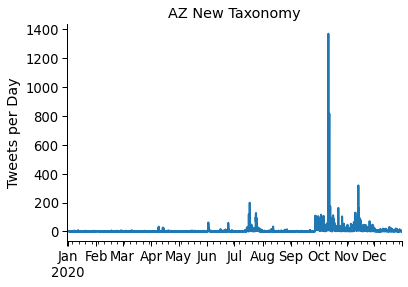

In [21]:
ax = sum([ddf.resample('1h').count()['id'] for ddf in dfs]).plot(lw = 2)

plt.title('AZ New Taxonomy')

#plt.xlim(pd.to_datetime('20210402 21:00'),pd.to_datetime('20210405'))
#plt.xlim(pd.to_datetime('20200630 06:00'),pd.to_datetime('20200703'))

plt.xlabel('')
plt.ylabel('Tweets per Day')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('plots/az_new_test.png',dpi = 300,bbox_inches = "tight")


In [124]:
dfs[0].head()

,text,id,created_at,author_id,newest_id,oldest_id,result_count,next_token,withheld,cleanText,matchedKeywords,detectedLangs
created_at,,,,,,,,,,,,
2020-12-30 22:21:45+00:00,азербайджанцы армяне турки греки: срутся 24/7 ...,1344408359831801860,2020-12-30T22:21:45.000Z,1707803491,NaN,NaN,NaN,NaN,NaN,азербайджанцы армяне турки греки срутся 24 7 в...,[азербайджанцы],[ru]
2020-12-30 21:26:22+00:00,Практически все азербайджанцы в этом убеждены....,1344394421249437696,2020-12-30T21:26:22.000Z,215663427,NaN,NaN,NaN,NaN,NaN,Практически все азербайджанцы в этом убеждены ...,[азербайджанцы],[ru]
2020-12-30 20:30:30+00:00,@AyselSayyakh @SasimaPanda @Kryz60664922 Все а...,1344380362156371974,2020-12-30T20:30:30.000Z,1219265351474728960,NaN,NaN,NaN,NaN,NaN,AyselSayyakh SasimaPanda Kryz60664922 Все азер...,[азербайджанцы],"[az, ru]"
2020-12-30 20:08:29+00:00,@1Esterra @SasimaPanda @Kryz60664922 Кто ковар...,1344374821170376704,2020-12-30T20:08:29.000Z,1407559639,NaN,NaN,NaN,NaN,NaN,1Esterra SasimaPanda Kryz60664922 Кто коварный...,[азербайджанцы],"[az, ru]"
2020-12-30 18:28:54+00:00,@JustasAlex5 Во время 2й мировой войны больше ...,1344349762171129857,2020-12-30T18:28:54.000Z,1194182703253540864,NaN,NaN,NaN,NaN,NaN,JustasAlex5 Во время 2й мировой войны больше и...,[азербайджанцы],[ru]


In [131]:
df = dfs[0]

In [132]:
df[df['author_id'] == '1310664236377550848']

,text,id,created_at,author_id,newest_id,oldest_id,result_count,next_token,withheld,cleanText,matchedKeywords,detectedLangs
created_at,,,,,,,,,,,,


In [102]:
df[df.index.month == 11.0].sample(20)['text'].values

array(['RT @KamillaRagim: Сын главного идеолога сепаратизма армян Зори Балаяна- военный врач: «Я сам все видел.Наверно, азербайджанцы были хорошо п…',
       '@VRSoloviev Так как оставку Пашиняна хотят все азербайджанцы значит он обязательно должен остаться на своем посту',
       'Ну, ну вы поняли какое РФ уебищное образование? \n\nТо что турки завоевали - им отдали, турецкие войска приходят туда офф.\n\n. То, что не завоевали в Карабахе, - на штыках Росс. миротворцев входят айзербонская "полиция" и геноцид и армян.',
       '@ShimonSeraf Знаешь,как азербайджанцы из-за аппетитов соседов как называют Армению?\n"Ермәним"\n"Ер" это земля,а "маним" мой,мое,моя..\nШутка,но есть правда..\nКажется,они на половину планеты претендуют..',
       '@VVP2_0 @AVyhodovanets Азербайджанцы пиздились с армянами 2 месяца за право русских контролировать Карабах... хах хах хах... \nЛетят чубы у холопов',
       'Азербайджанцы перенесли войну в Москву. Бои идут на улицах - началась облава https://t.co/Ewl8

In [104]:
dfs[0].sample(10)['text'].values

array(['RT @newkc14: #Азербайджанцы обнаржули на захваченной позиции #армянских войск много героина, кокаина и др. наркотиков #карабах https://t.co…',
       'RT @G_Garrison_: "В Москве азербайджанцы напали на автомобили с армянскими номерами и на армянское население и избили их, одного ударили но…',
       'RT @Soviet_flag: Грузины, азербайджанцы и армяне)))\n\nСмеюсь и плачу...\nБудь проклята война, будь проклят капитализм! https://t.co/wNqWVYL9DJ',
       'RT @newkc14: ‼ Обстрелы базаров это чисто #русская, а теперь и армянская военная традиция. #Армяне нанесли удар ракетами "Точка У" по рыку…',
       'RT @azizakhanumm: Это Ходжалы!  26 февраля 1992 года наши люди были зверски убиты, подвергнуты невообразимым пыткам и оккупировали Ходжалы.…',
       'RT @shatalkin: Армяне за пендосов, азербайджанцы за турков!\nПри каких делах здесь Русские?',
       'Есть в подписчиках адекватные азербайджанцы? Объяните почему Вы так относитесь к Арцаху? Я понимаю что территорию вам подарили Англич

In [13]:
df = dfs[0]

In [14]:
df['text'] = df['text'].astype(str)

## Get Language

In [16]:
df['lang'] = df['text'].apply(getLang)

In [17]:
print(df['lang'].value_counts(normalize = True)[0:10])

ru    0.9
ky    0.1
Name: lang, dtype: float64


## Clean Text

In [82]:
df = dfs[0]

In [83]:
def cleanText(s):
    s = re.sub(r'[/\\\-]',' ',str(s))
    return re.sub(r'[^\w\s]','',s)

In [84]:
df['cleanText'] = df['text'].apply(cleanText)

## Get Keywords Matched

In [ ]:
qs[0].split(' OR ')

In [63]:
'test '.strip(' ')

'test'

In [72]:
qs[0]

'(аннексия Нахичевани  ) OR (Армения и Арцах  ) OR (Армянские погромы в Баку  ) OR (Армяне в Гяндже  ) OR (Арцах, Тигранакерт  ) OR (Авантюрная политика Азербайджана  ) OR (Агрессивная политика Азербайджана  ) OR (Милитаристская политика Азербайджана  ) OR (Азербайджанская пропаганда  ) OR (Азербайджанские беженцы  ) OR (Азербайджанские вандалы  ) OR (Азербайджанцы  ) OR (Азербайджанцы живущие в пещерах  ) OR (Азербайджанская пропагандистская истерия  ) OR (Нагорно безопасность границ  ) OR (Нагорно Перемирие  ) OR (Нагорно Сосуществование  ) OR (Нагорно Сосуществование  ) OR (Нагорно Каналы связи  ) OR (Нагорно Каналы связи  ) OR (Нагорно Компромисс  ) OR (Нагорно Механизм уверенности  ) OR (Нагорно Механизм уверенности  ) OR (Нагорно Диалог  ) OR (Нагорно Экономическое сотрудничество  ) OR (Нагорно Исключение применения силы  ) OR (Нагорно Будущие перспективы  ) OR (Нагорно Газоснабжение  ) OR (Геноцид армян в Карабахе  ) OR (Армения Признание геноцида  ) OR (Нагорно Заложники  ) OR 

In [85]:
def getMatchingKeywords(t,qs):
    
    matches = []
    
    # Just consider first matching keyword for now
    tokens = t.lower().split()
    
    for q in qs:
        for kw in q.split(' OR '):
            kw = re.sub('[\(\)]','',kw)
            kw = kw.strip(' ').lower()
            if kw in tokens:
                #print('MATCHED',kw)
                matches.append(kw)
    return matches

In [86]:
df['matchedKeywords'] = dfs[0]['cleanText'].apply(lambda x:getMatchingKeywords(x,qs))

In [87]:
df['matchedKeywords'].explode().value_counts()

азербайджанцы    43543
карвачар             2
Name: matchedKeywords, dtype: int64

## Get top tokens

In [90]:
termCounter = collections.Counter()

In [91]:
_ = df['cleanText'].apply(lambda x:termCounter.update(x.split(' ')))

created_at
2020-12-30 22:21:45+00:00    None
2020-12-30 21:26:22+00:00    None
2020-12-30 20:30:30+00:00    None
2020-12-30 20:08:29+00:00    None
2020-12-30 18:28:54+00:00    None
                             ... 
2019-12-31 12:50:40+00:00    None
2019-12-31 08:15:27+00:00    None
2019-12-31 07:05:33+00:00    None
2019-12-31 05:04:17+00:00    None
2019-12-31 04:13:17+00:00    None
Name: cleanText, Length: 59514, dtype: object

In [97]:
for k,v in termCounter.most_common(35):
    print(translator.translate(k).text,v)

 57889
и 37984
RT 37377
в 28527
азербайджанцы 25433
не 17240
Азербайджанцы 16472
на 15352
что 14007
tco 12549
https 11732
с 10132
Армения 9989
армяне 8921
гражданские 8060
это 7466
за 6504
как 6086
Азербайджана 4991
В 4899
а 4872
Это 4710
по 4604
своими 4579
из 4541
все 4481
города 4458
город 4166
большой 4046
самый 4013
Армяне 3993
второй 3984
бомбит 3981
армян 3933
к 3855


## Which keywords do not appear?

In [88]:
kwFreq = df['matchedKeywords'].explode().value_counts().to_dict()

In [89]:
for kw in queryToList(qs[0]):
    if not kwFreq.get(kw):
        print(kw)

(аннексия Нахичевани  )
(Армения и Арцах  )
(Армянские погромы в Баку  )
(Армяне в Гяндже  )
(Арцах, Тигранакерт  )
(Авантюрная политика Азербайджана  )
(Агрессивная политика Азербайджана  )
(Милитаристская политика Азербайджана  )
(Азербайджанская пропаганда  )
(Азербайджанские беженцы  )
(Азербайджанские вандалы  )
(Азербайджанцы  )
(Азербайджанцы живущие в пещерах  )
(Азербайджанская пропагандистская истерия  )
(Нагорно безопасность границ  )
(Нагорно Перемирие  )
(Нагорно Сосуществование  )
(Нагорно Сосуществование  )
(Нагорно Каналы связи  )
(Нагорно Каналы связи  )
(Нагорно Компромисс  )
(Нагорно Механизм уверенности  )
(Нагорно Механизм уверенности  )
(Нагорно Диалог  )
(Нагорно Экономическое сотрудничество  )
(Нагорно Исключение применения силы  )
(Нагорно Будущие перспективы  )
(Нагорно Газоснабжение  )
(Геноцид армян в Карабахе  )
(Армения Признание геноцида  )
(Нагорно Заложники  )
(Нагорно военнопленные  )


In [53]:
tempDf = pd.read_csv('data_az_hy_cleaned_kws_jun_jul_aug0.csv')


In [54]:
tempDf.set_index(pd.to_datetime(tempDf['created_at'],errors = 'coerce'),inplace = True)

<AxesSubplot:xlabel='created_at'>

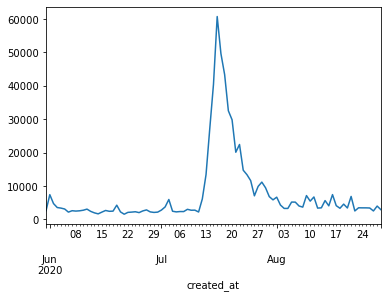

In [55]:
tempDf.resample('1d').count()['id'].plot()

In [58]:
for v in df[df['matchedKeywords'].apply(len) == 0]['text'].sample(10):
    print(v)
    print('===========')

RT @DominikKucinsk: Podsumowując:

New York Times, Washington Post, Financial Times, The Guardian, Le Figaro, Deutsche Welle, Politico... w…
RT @DominikKucinsk: Podsumowując:

New York Times, Washington Post, Financial Times, The Guardian, Le Figaro, Deutsche Welle, Politico... w…
RT @DominikKucinsk: Podsumowując:

New York Times, Washington Post, Financial Times, The Guardian, Le Figaro, Deutsche Welle, Politico... w…
RT @TasakNarodowy: Polska nie rozliczyła się z PRLem.Bez lustracji dzieci/wnuki UBeków/służb PRLu bogacą się/niszczą Polskę.

Przez pokolen…
RT @JSaryuszWolski: „Węgry przyjmują uchwałę Parlamentu odrzucającą warunkowanie [funduszy] praworządnością i żądającą zakończenia procedur…
RT @DominikKucinsk: Prawdziwa komedia🤣

Gdy NYT wskazuje, że porozumienie w sprawie uzyskano dzięki ustępstwom na rzecz Polski ws praworząd…
RT @DominikKucinsk: Prawdziwa komedia🤣

Gdy NYT wskazuje, że porozumienie w sprawie uzyskano dzięki ustępstwom na rzecz Polski ws praworząd…
RT @Azerin_: 

In [62]:
df['matchedKeywords'].apply(len).value_counts()

1    6097
0    1604
2      12
Name: matchedKeywords, dtype: int64

In [204]:
df['cleanText'].head().values

array(['rt  azpresident  qəbuledilməz şərtlər irəli sürməklə ermənistan faktiki olaraq danışıqlar prosesini məhv edir və danışıqlar formatını dəyiş ',
       'rt  azpresident  qəbuledilməz şərtlər irəli sürməklə ermənistan faktiki olaraq danışıqlar prosesini məhv edir və danışıqlar formatını dəyiş ',
       ' dojebanyusernam tak  to przez te romantyczne lektury szkolne czekacie i wierzycie  podział kulturowy jest taki  ze ewentualnie może być w przyszłości  kompromis obyczajowy  między poglądami sakiewicza i lisa  i tyle ',
       'rt  azpresident  qəbuledilməz şərtlər irəli sürməklə ermənistan faktiki olaraq danışıqlar prosesini məhv edir və danışıqlar formatını dəyiş ',
       'rt  azpresident  qəbuledilməz şərtlər irəli sürməklə ermənistan faktiki olaraq danışıqlar prosesini məhv edir və danışıqlar formatını dəyiş '],
      dtype=object)

In [217]:
df['cleanText'].head().apply(lambda x:getMatchingKeywords(x,qs))

created_at
2020-07-30 23:59:12+00:00    [danışıqlar]
2020-07-30 23:48:31+00:00    [danışıqlar]
2020-07-30 23:44:58+00:00     [kompromis]
2020-07-30 23:36:32+00:00    [danışıqlar]
2020-07-30 23:32:21+00:00    [danışıqlar]
Name: cleanText, dtype: object

## Get some samples from different languages

In [195]:
for s in df[df['lang'] == 'az'].sample(20)['text'].values:
    print(s)
    print('***')

RT @wwwmodgovaz: Atəşkəs
https://t.co/4yOVpUAeXi https://t.co/FJhIIkRH4Z
***
RT @ArzuAliyeva__: İndi gəlin Şəhid övladlarına atəşkəsi anladaq. Hələ şəkildə olmayan 8il yolu gözlənən iki körpədə var. Nə deyəcəyik onla…
***
Məlum olub ki, Elmar Məmmədyarov bu illər ərzində Kolumbia ilə danışıqlar aparırmış
***
RT @OfaAfandi: Dostlar, atəşkəs bərpa olundu deyə rahatlaşmayın. Oyanmaq üçün 4 il gözləməyə ehtiyac yoxdur. Unutmayın ki, ermənilər öz təb…
***
Ermənistan atəşkəsi minaatanlar və digər artilleriya qurğularından istifadə etməklə pozub - RƏSMİ https://t.co/joRBeFRddf
***
RT @iamulvi_: Ermənistanın apardığı işğalçı siyasəti, neçə-neçə milli dəyərlərimizi öz adlarına çıxarmasını, Tovuz bölgəsində atəşkəsi pozm…
***
RT @azpresident: Qəbuledilməz şərtlər irəli sürməklə Ermənistan faktiki olaraq danışıqlar prosesini məhv edir və danışıqlar formatını dəyiş…
***
RT @azpresident: Qəbuledilməz şərtlər irəli sürməklə Ermənistan faktiki olaraq danışıqlar prosesini məhv edir və danışıqlar forma

In [196]:
for s in df[~(df['lang'] == 'az')].sample(20)['text'].values:
    print(s)
    print('***')

RT @MaksAtak: @ttxyn1 Zmuś się na kompromis 😉
Proszę i liczę na wspólną Perłę 🍻
***** **** !!
***
RT @sedabdull: @CelaleRehimli @GZulfugarova @BBCNews @BBCWorld @CNN @CNNPolitics @NASA @TheSun @guardian @nytimes @TIME @WhiteHouse @HISTOR…
***
RT @tomiokarockcock: Najważniejsza w relacjach jest komunikacja. Jesli czujesz, ze dostajesz za malo uwagi od przyjaciela - powiedz to. Nik…
***
@justatramp @MarinikaTepic Prijatelju, mi smo jednom, 5. Oktobra napravili truli kompromis pričom “začepiti nos, glasati za DOS”. Iako nije bilo više ratova, bilo je pljačke epskih razmera. I sve ovo što se dešava danas je posledica toga. Kompletna politička elita je trula i nema ‘leba od Murte.
***
RT @wnppl: "Grupa skąpców" nie pozwala na kompromis w sprawie budżetu unijnego - to diagnoza @MorawieckiM 
@ParlamentarnyPL 
https://t.co/l…
***
RT @TygodnikNIE: Udało się osiągnąć kompromis. Polska otrzyma z Brukseli 125 mld euro, ale będą wypisane na czekach z dykty.
***
@pawlobp @LeszekMiller @Matylda_Biesi

In [197]:
df.head()

,text,created_at,id,author_id,newest_id,oldest_id,result_count,next_token,lang,cleanText,matchedKeyword
created_at,,,,,,,,,,,
2020-07-30 23:59:12+00:00,RT @azpresident: Qəbuledilməz şərtlər irəli sü...,2020-07-30T23:59:12.000Z,1288987542331764737,2186513312,NaN,NaN,NaN,NaN,az,rt azpresident qəbuledilməz şərtlər irəli sü...,[kompromis]
2020-07-30 23:48:31+00:00,RT @azpresident: Qəbuledilməz şərtlər irəli sü...,2020-07-30T23:48:31.000Z,1288984851333382144,1020817891766210565,NaN,NaN,NaN,NaN,az,rt azpresident qəbuledilməz şərtlər irəli sü...,[kompromis]
2020-07-30 23:44:58+00:00,"@dojebanyusernam Tak, to przez te romantyczne ...",2020-07-30T23:44:58.000Z,1288983958517055488,1071799161627004928,NaN,NaN,NaN,NaN,pl,dojebanyusernam tak to przez te romantyczne ...,[kompromis]
2020-07-30 23:36:32+00:00,RT @azpresident: Qəbuledilməz şərtlər irəli sü...,2020-07-30T23:36:32.000Z,1288981836585205761,350173693,NaN,NaN,NaN,NaN,az,rt azpresident qəbuledilməz şərtlər irəli sü...,[kompromis]
2020-07-30 23:32:21+00:00,RT @azpresident: Qəbuledilməz şərtlər irəli sü...,2020-07-30T23:32:21.000Z,1288980783714185221,853536048122560513,NaN,NaN,NaN,NaN,az,rt azpresident qəbuledilməz şərtlər irəli sü...,[kompromis]


## Multi-lang Detection

In [105]:
import lang_detect

In [107]:
lang_detect.detect_multi_lang('RT @azpresident: Qəbuledilməz şərtlər irəli sü...')

['az']

In [108]:
for df in dfs:
    print(df.shape)

(59514, 11)
(3722, 11)


In [113]:
dfs[0]['detectedLangs'] = dfs[0]['cleanText'].apply(lang_detect.detect_multi_lang)

In [123]:
dfs[0]['detectedLangs'].value_counts()/dfs[0].shape[0]

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[az, ru]        0.556356
[ru]            0.414743
[az]            0.014585
[az, ar, ru]    0.011207
[]              0.002352
[ar, ru]        0.000723
[az, ar]        0.000034
Name: detectedLangs, dtype: float64